In [1]:
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import random
from datetime import datetime, timedelta

# Cryptocurrency Case Study Backtester

In [2]:
#importing data !
b1 = pd.read_csv('./CTC23_Blockchain_Data/BTC_Futures1.csv')
b2 = pd.read_csv('./CTC23_Blockchain_Data/BTC_Futures2.csv')
b3 = pd.read_csv('./CTC23_Blockchain_Data/BTC_Futures3.csv')
b4 = pd.read_csv('./CTC23_Blockchain_Data/BTC_Futures4.csv')
b5 = pd.read_csv('./CTC23_Blockchain_Data/BTC_Futures5.csv')
b6 = pd.read_csv('./CTC23_Blockchain_Data/BTC_Futures6.csv')
b7 = pd.read_csv('./CTC23_Blockchain_Data/BTC_Futures7.csv')
b8 = pd.read_csv('./CTC23_Blockchain_Data/BTC_Futures8.csv')
b9 = pd.read_csv('./CTC23_Blockchain_Data/BTC_Futures9.csv')
b10 = pd.read_csv('./CTC23_Blockchain_Data/BTC_Futures10.csv')
b11 = pd.read_csv('./CTC23_Blockchain_Data/BTC_Futures11.csv')
b12 = pd.read_csv('./CTC23_Blockchain_Data/BTC_Futures12.csv')
b13 = pd.read_csv('./CTC23_Blockchain_Data/BTC_Futures13.csv')
b14 = pd.read_csv('./CTC23_Blockchain_Data/BTC_Futures14.csv')
b15 = pd.read_csv('./CTC23_Blockchain_Data/BTC_Futures15.csv')
b16 = pd.read_csv('./CTC23_Blockchain_Data/BTC_Futures16.csv')
b17 = pd.read_csv('./CTC23_Blockchain_Data/BTC_Futures17.csv')
b18 = pd.read_csv('./CTC23_Blockchain_Data/BTC_Futures18.csv')
b19 = pd.read_csv('./CTC23_Blockchain_Data/BTC_Futures19.csv')
b20 = pd.read_csv('./CTC23_Blockchain_Data/BTC_Futures20.csv')
b21 = pd.read_csv('./CTC23_Blockchain_Data/BTC_Futures21.csv')
b22 = pd.read_csv('./CTC23_Blockchain_Data/BTC_Futures22.csv')
b23 = pd.read_csv('./CTC23_Blockchain_Data/BTC_Futures23.csv')
b24 = pd.read_csv('./CTC23_Blockchain_Data/BTC_Futures24.csv')

In [3]:
allData = [b1, b2, b3, b4, b5, b6, b7, b8, b9, b10, b11, b12, b13, b14, b15, b16, b17, b18, b19, b20, b21, b22, b23, b24]
data = pd.concat(allData, ignore_index=True)

#FOR COMPETITORS: Don't forget to convert the first column to a datetime object

In [5]:
#add your positions here

#positions = pd.DataFrame({
#    "DATETIME": ts_recv, 
#    "POSITION": positions})


In [4]:
'''
Given a dataframe of positions check that the dates and positions are valid.
'''

def check_crypto_output(marketdata, positions):
    # check if positions is a dataframe
    assert isinstance(positions, pd.DataFrame), "positions should be a dataframe"
    assert "DATETIME" in positions.columns, "positions dataframe does not have 'DATETIME' column, please read naming specifications"
    
    # check whether every value in 'DATETIME' is a datetime object
    assert positions['DATETIME'].apply(lambda x: isinstance(x, pd.Timestamp)).all(), "every element in 'DATETIME' column of positions should be a datetime object"

    # check if right number of dates, and that they are equal
    assert pd.to_datetime(marketdata['ts_event']).equals(positions['DATETIME']), "the 'DATETIME' column of positions should match 'ts_event' of marketdata column"
    
    # check if all outputs are valid
    assert all(positions['POSITION'].isin([-1, 0, 1])), "all values in 'DATETIME' column need to be either -1, 0 or 1"

In [7]:
check_crypto_output(data, positions)

In [8]:
positions

,DATETIME,POSITION
0,2019-10-01 00:00:01.973454336,-1
1,2019-10-01 00:00:09.224500736,1
2,2019-10-01 00:00:10.910937600,1
3,2019-10-01 00:00:11.183918336,1
4,2019-10-01 00:00:12.014056448,0
...,...,...
1212565,2019-11-29 18:13:00.570803712,-1
1212566,2019-11-29 18:13:19.066600704,0
1212567,2019-11-29 18:13:49.742037504,0
1212568,2019-11-29 18:14:21.043888128,1


In [5]:
'''
Overview: given a list of positions use provided market data to find the 
overall pnl.
'''

def backtest(marketdata: pd.DataFrame, positions: pd.DataFrame, y_list) -> None:
   check_crypto_output(marketdata, positions)
   return check_pnl(marketdata, positions, y_list)


def check_pnl(marketdata: pd.DataFrame, positions: pd.DataFrame, y_list) -> None:
    pnl = 0  # inital capital is 0 dollars
    curpos = 0 # setting initial position to neutral
    spread_cost = 0 # track total spread
    
    for index, row in marketdata.iterrows():
        bid_price = row['bid_px_00']
        ask_price = row['ask_px_00']
        signal = positions.loc[index, 'POSITION'] # whether we buy or sell
        
        # calculate spread cost
        spread = (ask_price - bid_price)/2
        
        #Note: You effectively trade at the midpoint at each time period, 
        #and are compensated for the spread when you both open and close a position. 

        # return to neutral
        if curpos == -1:
            pnl -= ask_price
        elif curpos == 1:
            pnl += bid_price
        
        # add spread
        if curpos != 0:
            spread_cost += spread

        # perform trade
        if signal == 1:
            pnl -= ask_price
        elif signal == -1:
            pnl += bid_price
        
        # add spread
        if signal != 0:
            spread_cost += spread
        
        # update position
        curpos = signal

        
        #Calculate PNL if we were to close - for graph
        pnl_close=pnl
        spread_close=spread_cost
        
        if curpos == -1:
            pnl_close -= ask_price
        elif curpos == 1:
            pnl_close += bid_price
        if curpos != 0:
            spread_close += spread
        
        y_list.append(pnl_close+spread_close)

    
    # return to neutral
    if curpos == -1:
        pnl -= ask_price
    elif curpos == 1:
        pnl += bid_price
    
    # add spread
    if curpos != 0:
        spread_cost += spread

    return (pnl + spread_cost)


In [10]:
pnl_on_day = []
backtest(data, positions, pnl_on_day)


2.76685257395094e+19

Text(0, 0.5, 'PNL')

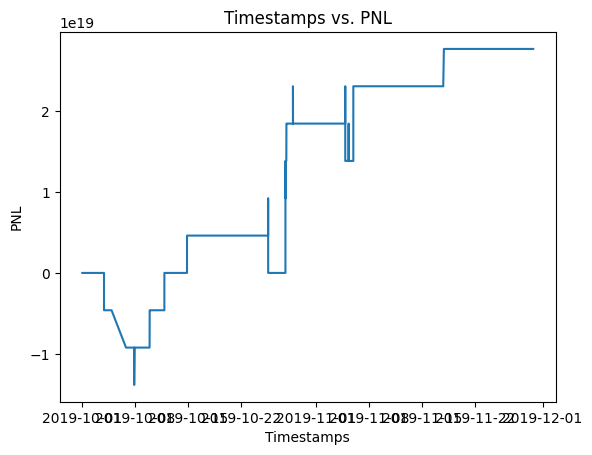

In [11]:
plt.plot(positions['DATETIME'], pnl_on_day)
plt.title('Timestamps vs. PNL')
plt.xlabel('Timestamps')
plt.ylabel('PNL')